# FIT5201_2018S2 Assignment 1 - Section E - Question 6

- <font color='blue'>**Student Id**</font>: 27771539
- <font color='blue'>**Student Name**</font>: Chuangfu Xie
- <font color='blue'>**Packages in use**</font>:
    - `repr`: Provide more control on graphical presentation
    - `ggplot2`: Data visualization package
    - `reshape2`: reshape data

# Multiclass Perceptron

## 0. Import packages

In [100]:
library(repr)
library(ggplot2)
library(reshape2)

## 1.  Load CSV

In [115]:
cnvrt_func <- function(factor,label){
    factor <- as.matrix(factor)
    indx <- factor == label[1]
    factor[indx] <- 1; factor[!indx] <- -1;
    return(as.numeric(factor))
}

get_labels <-function(train, test, label){
    train.label <- cnvrt_func(train[,5],label)
    test.label <- cnvrt_func(test[,5],label)
    return(list('tr_label'=train.label,'ts_label'=test.label))
}

SGD_q6 <- function(Phi, train.label, W, eta, epsilon, tau.max, error){
    tau <- 1 # iteration counter 
    terminate <- FALSE # termination status
    train.len <- nrow(Phi)
    while(!terminate){
        # resuffling train data and associated labels:
        train.index <- sample(1:train.len, replace = FALSE)
        Phi <- Phi[train.index,]; T <- train.label[train.index]

        for (i in 1:train.len){
            if (tau == tau.max) {break}

            # look for missclassified samples
            if ((W[tau,]%*%Phi[i,])*T[i]<0){

                # update tau counter
                tau <- tau +1

                # update the weights
                W[tau,] <- W[tau-1,] + eta * Phi[i,] * T[i]

                # update the records
                error[tau] <- sum((Phi%*%W[tau,])*T<0)/train.len*100
            }

        }

        # decrease eta:
        eta = eta * 0.99
        # recalculate termination conditions
        terminate <- tau >= tau.max | 
            abs(sum((Phi%*%W[tau,])*T<0)/train.len - sum((Phi%*%W[tau-1,])*T<0)/train.len) <= epsilon 

    }
    return(list('W'=W[1:tau,],'error'=error)) # cut the empty part of the matrix 
}

In [116]:
train <- read.csv('./datasets/Task1D_train.csv')
test <- read.csv('./datasets/Task1D_train.csv')
# Control the iteration
label <- unique(train[,5])
# Preparing data and label
n_class <- length(label)
train.data <- train[,-5]
test.data <- test[,-5]

In [117]:
eta <- 0.09 # Learning rate
epsilon <- 0.001 # Stoping criterion
tau.max <- 100 # Maximum number of iterations

Phi <- as.matrix(cbind('x0'=1, train.data)) 
result <- NA
Error <- NA
for (i in 1: n_class){
    if (length(label) == 2){break}
    #prepare for data
    all <- get_labels(train,test,label)
    train.label <- all$tr_label
    test.label <- all$ts_label
    W <- matrix(,nrow=tau.max, ncol=ncol(Phi))
    if (i==1){
         # Empty Weight vector
        W[1,] <- runif(ncol(Phi))
    }else{
        W[1,] <- result[nrow(result),]
    }
    
    error <- matrix(0, nrow=tau.max, ncol=1)
    #use SGD
    outputs <- SGD_q6(Phi, train.label, W, eta, epsilon, tau.max, error)
    new_W <- outputs$W 
    error <- outputs$error
    
    if (sum(is.na(result))){
        result <- new_W
    }else{
        result <- rbind(result, new_W)
    }
    
    if (sum(is.na(Error))){
        Error <- error
    }else{
        Error <- rbind(Error, error)
    }
    
    #update label
    label <- label[-1]
}

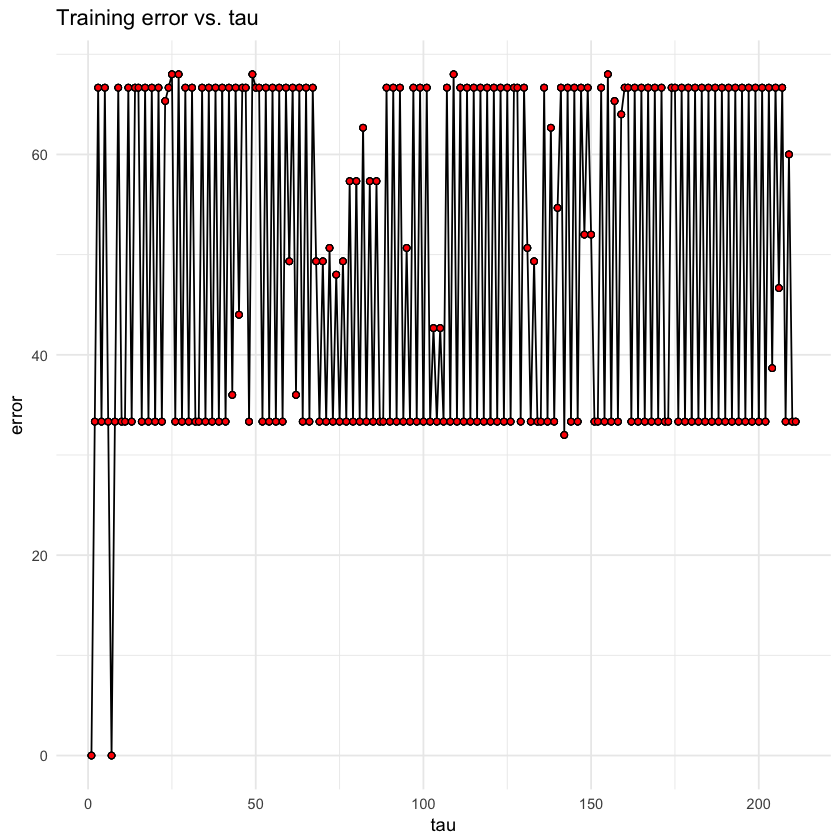

In [118]:
out <- data.frame('tau'=1:nrow(result))
out$error <- Error[1:nrow(result)]
out[,c('w0', 'w1', 'w2', 'w3', 'w4')] <- result

out.m <- melt(out, id=c('tau', 'error'))
names(out.m) <- c('tau', 'error', 'W', 'coefficient')

ggplot(data=out.m,aes(x=tau, y=error)) + geom_line() + geom_point(shape=21, fill='red')  +
    ggtitle('Training error vs. tau') + theme_minimal()